Frequency Distributions



In [1]:
import pandas as pd

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

wnba = pd.read_csv('wnba.csv')
wnba.shape
print(wnba)

                         Name Team  Pos  Height  Weight        BMI  \
0               Aerial Powers  DAL    F     183    71.0  21.200991   
1                 Alana Beard   LA  G/F     185    73.0  21.329438   
2                Alex Bentley  CON    G     170    69.0  23.875433   
3             Alex Montgomery  SAN  G/F     185    84.0  24.543462   
4                Alexis Jones  MIN    G     175    78.0  25.469388   
5             Alexis Peterson  SEA    G     170    63.0  21.799308   
6               Alexis Prince  PHO    G     188    81.0  22.917610   
7               Allie Quigley  CHI    G     178    64.0  20.199470   
8                Allisha Gray  DAL    G     185    76.0  22.205990   
9           Allison Hightower  WAS    G     178    77.0  24.302487   
10               Alysha Clark  SEA    F     180    76.0  23.456790   
11              Alyssa Thomas  CON    F     188    84.0  23.766410   
12            Amanda Zahui B.   NY    C     196   113.0  29.414827   
13               Amb

A frequency distribution table has two columns. One column records the unique values of a variable, and the other the frequency of each unique value.

In [2]:
print(wnba['Pos'].value_counts())

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64


In [3]:
print(wnba['Height'].value_counts())

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64


In [4]:
# Sorting
print(wnba['Height'].value_counts().sort_index())

165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: Height, dtype: int64


In [5]:
wnba['Age'].value_counts().sort_index()

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

In [6]:
wnba['Age'].value_counts().sort_index(ascending = False)

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

Sorting Tables for Ordinals

We've added more granularity to the ordinal scale above:

| Condition | Label   |
|-----------|---------|
| points <= 20 |  very few points |
|||
| 20 < points <= 80	| few points |
|||
|80 < points <= 150	| many, but below average |
|||
|150 < points <= 300  |	average number of points |
|||
| 300 < points <= 450 |	more than average |
|||
| points > 450 | much more than average |


Generate a frequency distribution table for the transformed PTS_ordinal_scale column.
Order the table by unique values in a descending order (not alphabetically).
Assign the result to a variable named pts_ordinal_desc.

In [8]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

# Type your answer below
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]
print(pts_ordinal_desc)

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64


In [9]:
percentages = wnba['Age'].value_counts(normalize = True).sort_index() * 100
proportion_25 = percentages[25] / 100
percentage_30 = percentages[30]
percentage_over_30 = percentages.loc[30:].sum()
percentage_below_23 = percentages.loc[:23].sum()

print(percentage_30)

6.293706293706294


In [11]:
from scipy.stats import percentileofscore
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind = 'weak')
percentage_half_more = 100 - percentile_rank_half_less

print(percentage_half_more)

83.91608391608392


To find percentiles with pandas, we can use the Series.describe() method, which returns by default the 25th, the 50th, and the 75th percentiles:

In [15]:
# returns by default the 25th, the 50th, and the 75th percentiles:
print(wnba['Age'].describe())

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64


We can use iloc[] to isolate just the output we want:

In [13]:
print(wnba['Age'].describe().iloc[3:])

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64


In [14]:
print(wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:])

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64


In [16]:
percentiles = wnba['Age'].describe(percentiles = [.5, .75, .95])
age_upper_quartile = percentiles['75%']
age_middle_quartile = percentiles['50%']
age_95th_percentile = percentiles['95%']

print(age_upper_quartile)
print(age_middle_quartile)
print(age_95th_percentile)

30.0
27.0
34.0


Grouped Frequency Distribution Tables

In [17]:
print(wnba['Weight'].value_counts().sort_index())

55.0      1
57.0      1
58.0      1
59.0      2
62.0      1
63.0      3
64.0      5
65.0      4
66.0      8
67.0      1
68.0      2
69.0      2
70.0      3
71.0      2
73.0      6
74.0      4
75.0      4
76.0      4
77.0     10
78.0      5
79.0      6
80.0      3
81.0      5
82.0      4
83.0      4
84.0      9
85.0      2
86.0      7
87.0      6
88.0      6
89.0      3
90.0      2
91.0      3
93.0      3
95.0      2
96.0      2
97.0      1
104.0     2
108.0     1
113.0     2
Name: Weight, dtype: int64


Examine the frequency table for the PTS (total points) variable trying to find some patterns in the distribution of values. Then, generate a grouped frequency distribution table for the PTS variable with the following characteristics:
 - The table has 10 class intervals.
 - For each class interval, the table shows percentages instead of frequencies.
 - The class intervals are sorted in descending order.
Assign the table to a variable named grouped_freq_table, then print it and try again to find some patterns in the distribution of values.

In [18]:
grouped_freq_table = wnba['PTS'].value_counts(bins = 10,
                normalize = True).sort_index(ascending = False) * 100
print(grouped_freq_table)

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64


Information Loss

In [19]:
print(wnba['PTS'].value_counts(bins = 10))

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(234.8, 293.0]    17
(118.4, 176.6]    17
(351.2, 409.4]    10
(409.4, 467.6]     8
(293.0, 351.2]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64


Readability 

In [20]:
print(wnba['PTS'].value_counts(bins = 5).sort_index())

(1.417, 118.4]    54
(118.4, 234.8]    37
(234.8, 351.2]    25
(351.2, 467.6]    18
(467.6, 584.0]     9
Name: PTS, dtype: int64


To fix this, we can define the intervals ourselves. For the table above, we can define six intervals of 100 points each, and then count how many values fit in each interval. 

Next, we show one way to code the intervals. We start with creating the intervals using the pd.interval_range()

In [21]:
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')


Next, we create a new Series using the intervals as indices, and, for now, 0 as values:

In [22]:
gr_freq_table = pd.Series([0,0,0,0,0,0], index = intervals)
print(gr_freq_table)

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64


Next, we loop through the values of the PTS column, and for each value:

 - We loop through the intervals we defined previously, and for each interval:
   - We check whether the current value from the PTS column belongs to that interval.
     - If the value doesn't belong to an interval, we continue the inner loop over the intervals.
   - If the value belongs to an interval:
     - We update the counting for that interval in gr_freq_table by adding 1.

We exit the inner loop over the intervals with break because a value can belong to one interval only, and it makes no sense to continue the loop (without using break, we'll get the same output but we'll do many redundant iterations).

In [23]:
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
print(gr_freq_table)

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64


Now we do a quick sanity check of our work. There are 143 players in the data set, so the frequencies should add up to 143:

In [24]:
print(gr_freq_table.sum())

143



Using the techniques above, generate a grouped frequency table for the PTS variable. The table should have the following characteristics:
There are 10 class intervals.
The first class interval starts at 0 (not included).
The last class interval ends at 600 (included).
Each interval has a range of 60 points.
Assign the table to a variable named gr_freq_table_10.

In [25]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0 for _ in range(10)], index = intervals)

for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break

In [26]:
print(gr_freq_table_10)

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64


Continuous variables

In [27]:
print(wnba['Height'].describe().iloc[3:])

min    165.0
25%    176.5
50%    185.0
75%    191.0
max    206.0
Name: Height, dtype: float64


Graphs for Frequency Distributions


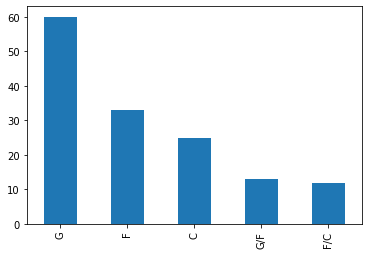

In [52]:
import matplotlib.pyplot as plt



wnba['Pos'].value_counts().plot.bar()

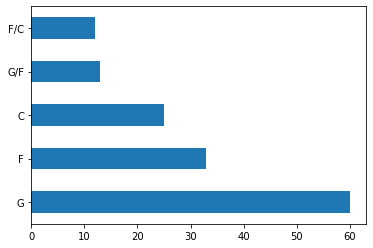

In [53]:
wnba['Pos'].value_counts().plot.barh()

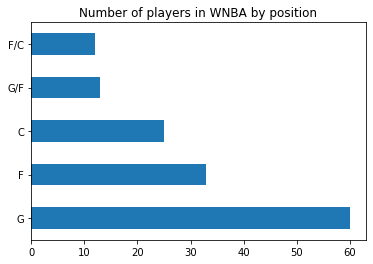

In [54]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

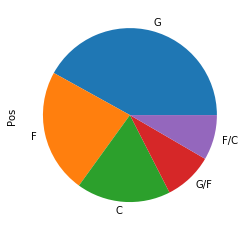

In [55]:
wnba['Pos'].value_counts().plot.pie()

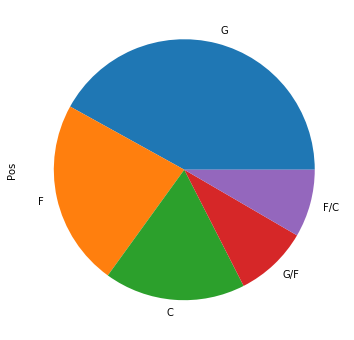

In [56]:
wnba['Pos'].value_counts().plot.pie(figsize = (6,6))

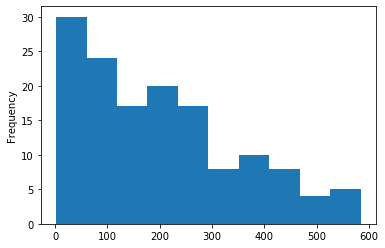

In [57]:
wnba['PTS'].plot.hist()

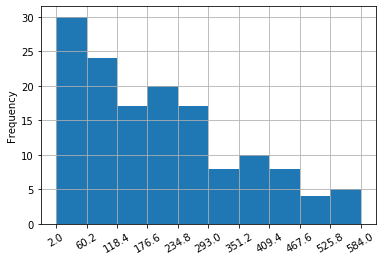

In [58]:
from numpy import arange
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

In [59]:
wnba['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

In [60]:
wnba['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

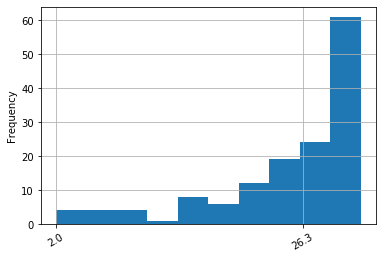

In [61]:
wnba['Games Played'].plot.hist(grid = True, xticks = arange(2,32,24.3), rot = 30)

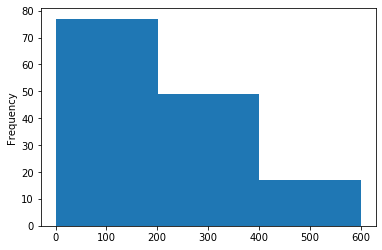

In [62]:
wnba['PTS'].plot.hist(range = (1,600), bins = 3)

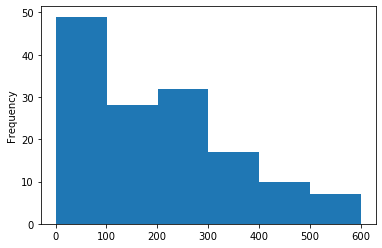

In [63]:
wnba['PTS'].plot.hist(range = (1,600), bins = 6)

Text(0.5, 0, 'Games played')

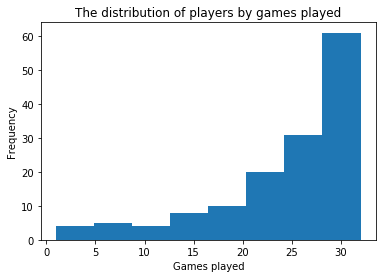

In [64]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8,
                               title = 'The distribution of players by games played')
plt.xlabel("Games played")

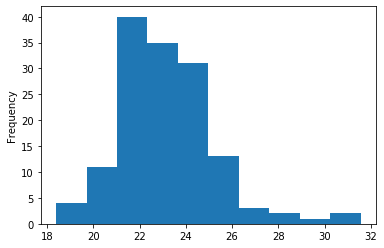

In [65]:
wnba['BMI'].plot.hist()

In [71]:
wnba['Experience'].describe()

count     143
unique     16
top         R
freq       23
Name: Experience, dtype: object

In [72]:
print(wnba['Experience'])

0       2
1      12
2       4
3       6
4       R
5       R
6       R
7       8
8       2
9       5
10      6
11      3
12      3
13      3
14      6
15      1
16      3
17      1
18      R
19      2
20      4
21      R
22      9
23      R
24      3
25      5
26     10
27     11
28     10
29     12
30     11
31      6
32      1
33      3
34      2
35      4
36      7
37      6
38      1
39     10
40      4
41      5
42      7
43      2
44      6
45     13
46      5
47      3
48      R
49      5
50      8
51      3
52     13
53      9
54     10
55      R
56      4
57      1
58      3
59     12
60      7
61      6
62      2
63      6
64      1
65      5
66      3
67     14
68      1
69      3
70      R
71      1
72      3
73      6
74      4
75      3
76      5
77      2
78      1
79      R
80      9
81      3
82      9
83      6
84      R
85      5
86      9
87      R
88     14
89      5
90      R
91      R
92      9
93      R
94      7
95     11
96      1
97      1
98      3
99      3


In [75]:
def make_exp_ordinal(row):
    if (row['Experience']) == 'R':
        return 'rookie'
    if (1 < (int(row['Experience'])) <=  3):
        return 'little experience'
    if (4 < (int(row['Experience'])) <=  5):
        return 'experienced'
    if (5 < (int(row['Experience'])) <= 10):
        return 'very experienced'
    else:
        return 'veteran'
    
wnba['Exp_ordinal_scale'] = wnba.apply(make_exp_ordinal, axis = 1)

# Type your answer below
exp_ordinal_desc = wnba['Exp_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1]]
print(exp_ordinal_desc)



experienced          14
rookie               23
veteran              39
little experience    30
very experienced     37
Name: Exp_ordinal_scale, dtype: int64


In [82]:
rookies = wnba[wnba['Exp_ordinal_scale'] == 'rookie']
little_xp = wnba[wnba['Exp_ordinal_scale'] == 'little experience']
experienced = wnba[wnba['Exp_ordinal_scale'] == 'experienced']
very_xp = wnba[wnba['Exp_ordinal_scale'] == 'very experienced']
veterans =  wnba[wnba['Exp_ordinal_scale'] == 'veteran']
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print('Rookies:','\n', rookie_distro, '\n\n', 'Little Experience', '\n', little_xp_distro, '\n\n', 'Experienced', '\n', experienced_distro, '\n\n',
      'Very Experienced', '\n', very_xp_distro, '\n\n', 'Veteran', '\n', veteran_distro)

Rookies: 
 G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 Little Experience 
 G      12
F       9
C       5
F/C     2
G/F     2
Name: Pos, dtype: int64 

 Experienced 
 G      5
C      3
F/C    2
G/F    2
F      2
Name: Pos, dtype: int64 

 Very Experienced 
 G      16
C       6
F       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 Veteran 
 G      13
F      12
C       7
G/F     4
F/C     3
Name: Pos, dtype: int64


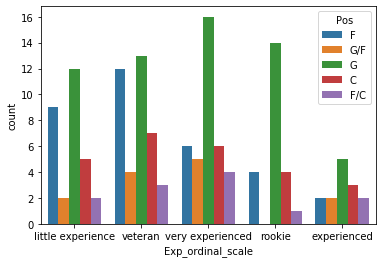

In [83]:
import seaborn as sns
sns.countplot(x = 'Exp_ordinal_scale', hue = 'Pos', data = wnba)

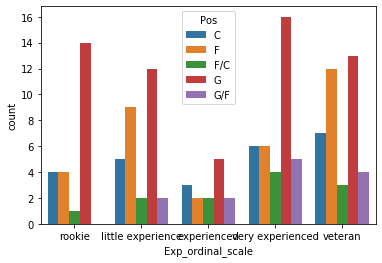

In [91]:
sns.countplot(x = 'Exp_ordinal_scale', hue = 'Pos', data = wnba, 
              order = ['rookie', 'little experience', 'experienced', 'very experienced', 'veteran'],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F']
             )

In [86]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')

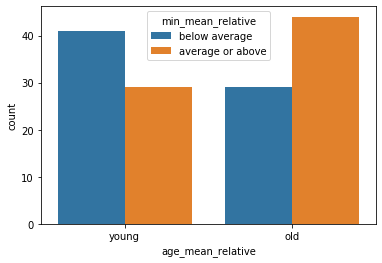

In [92]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)

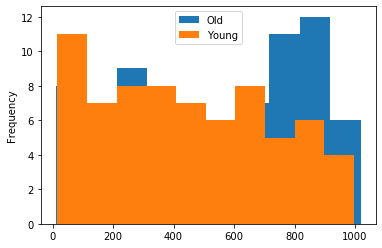

In [93]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

Plotting only the shape of the histograms using step

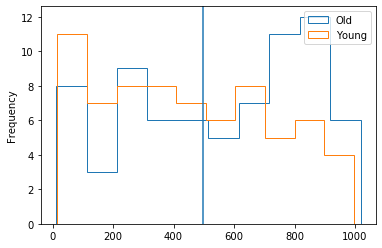

In [95]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')

kernel density estimate plot

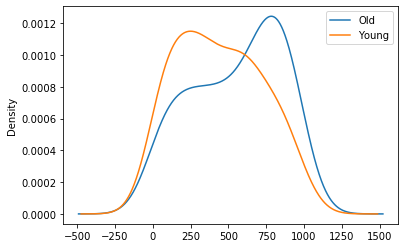

In [96]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

'We can still observe that most of the old players that belong to the "average or above"\ncategory play significantly more than average. With the help of the vertical line, the pattern\nis very easy to notice. Because the graph looks much cleaner than the one with step-type\nhistograms, we can easily argue that the pattern is much more obvious in the case of kernel density\nplots.'

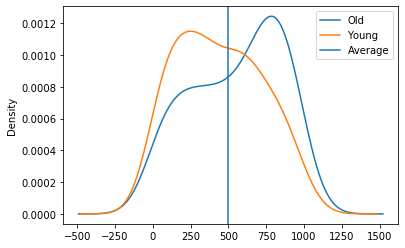

In [98]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()

'''We can still observe that most of the old players that belong to the "average or above"
category play significantly more than average. With the help of the vertical line, the pattern
is very easy to notice. Because the graph looks much cleaner than the one with step-type
histograms, we can easily argue that the pattern is much more obvious in the case of kernel density
plots.'''

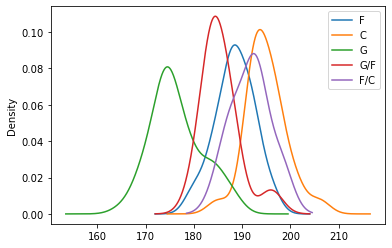

In [100]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)


Drawbacks of Kernel Plots

If we look very closely, we can see a couple of clear patterns: the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position

If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way.

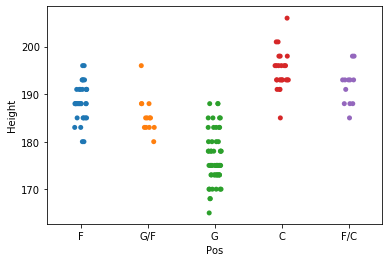

In [101]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

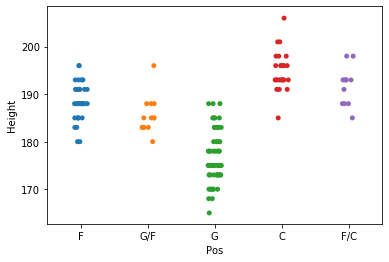

In [102]:
''' big downside of strip plots is that the bullet points overlap. 
We can fix this by adding a bit of jitter to each distribution'''

sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)

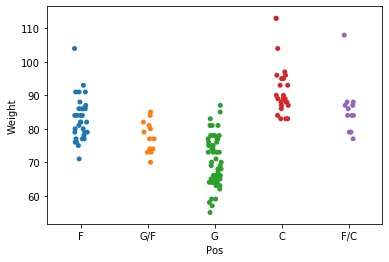

In [103]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)



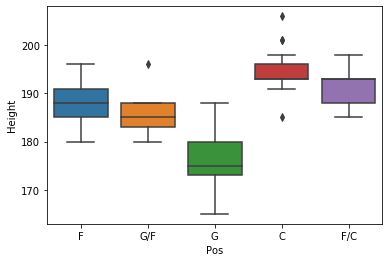

In [104]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

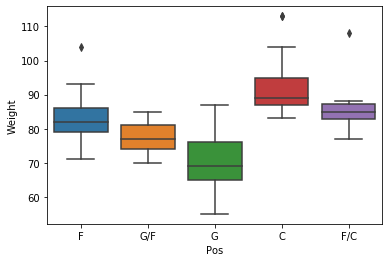

In [105]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

In [106]:
wnba[wnba['Pos'] == 'C']['Height'].describe()

count     25.000000
mean     194.920000
std        4.132392
min      185.000000
25%      193.000000
50%      193.000000
75%      196.000000
max      206.000000
Name: Height, dtype: float64

interquartile range = upper quartile - lower quartile

increase or decrease outlier using whis

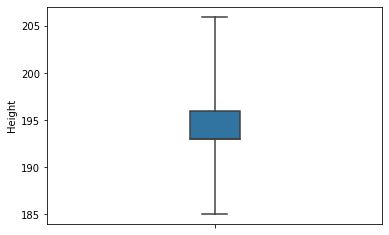

In [109]:
'''
increase or decrease outlier using whis
If the factor is increased, then the range outside which values are considered outliers increases as well. 
If the factor is decreased, the range outside which values are considered outlier decreases as well.
'''

sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4,
           orient = 'vertical', width = .15)

In [111]:
print(wnba['Games Played'].describe())

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


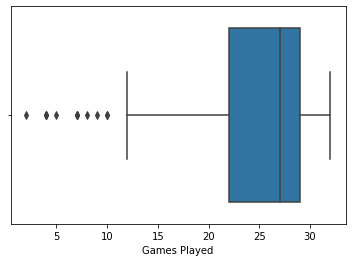

In [110]:

iqr = 29 - 22
lower_bound = 22 - (1.5 * iqr)
upper_bound = 29 + (1.5 * iqr)
outliers_low = sum(wnba['Games Played'] < lower_bound) # True values will count as 1 in the summation
outliers_high = sum(wnba['Games Played'] > upper_bound)

sns.boxplot(wnba['Games Played'])